In [1]:
import time

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import torch
import torch.nn as nn
from torch.optim import Adam, SGD
import torch.optim.lr_scheduler as scheduler
from torch.utils.data import random_split,DataLoader

import torchvision
from torchvision.datasets import CIFAR10,CIFAR100
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor,Normalize

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.device(0))

cuda
0
1
GeForce RTX 3090


In [3]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print('학습을 진행하는 기기:',device)

True
학습을 진행하는 기기: cuda:0


In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
ds10=CIFAR10(root="./data",download=True,train=True,transform=transform)
ts10=CIFAR10(root="./data",download=True,train=False,transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
tr10,vs10,_=random_split(ds10,[10000,10000,30000],torch.manual_seed(1))

In [7]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.layer3 = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10),
            )
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        #out = out.view(out.size(0),-1) #Flatten feature mapes to one-dimension vector
        out = out.view(-1,16*5*5)
        out = self.layer3(out)
        return out


In [8]:
myCnn=MyCNN().to(device)
training_epochs=20
batch_size=4
obj=nn.CrossEntropyLoss().to(device)
opt=SGD(myCnn.parameters(),lr=0.1, momentum=0.5)

In [9]:
tr10_loader=DataLoader(dataset=tr10,
                      batch_size=batch_size,
                      shuffle=True,
                      drop_last=True)

vs10_loader=DataLoader(dataset=vs10,
                      batch_size=batch_size,
                      shuffle=False)

In [10]:
start=time.time()

training_loss_history=[]
validation_loss_history=[]

for epoch in range(training_epochs):
    training_loss=0.0
    validation_loss=0.0
    for X,y in tr10_loader:
        X=X.to(device)
        y=y.to(device)
        
        opt.zero_grad()
        output=myCnn(X) 
        cost=obj(output,y)
        cost.backward()
        opt.step()
        
        training_loss+=cost.item()
        
    with torch.no_grad():
        for X,y in vs10_loader:
            X=X.to(device)
            y=y.to(device)
            
            output=myCnn(X)
            cost=obj(output,y)
            
            validation_loss+=cost.item()
            
#    if epoch==39:        
#        sch.step()        
    training_loss_history.append(training_loss/(10000/batch_size))
    validation_loss_history.append(validation_loss/(10000/batch_size))
    print("[ Epoch: ",epoch+1," loss :",training_loss/(10000/batch_size)," validation :",validation_loss/(10000/batch_size),"]")
    
print("Time :",time.time()-start)

[ Epoch:  1  loss : 2.1767827629566194  validation : 2.064249436378479 ]
[ Epoch:  2  loss : 2.146871922636032  validation : 2.151099057149887 ]
[ Epoch:  3  loss : 2.105404652070999  validation : 2.1020242554187774 ]
[ Epoch:  4  loss : 2.111145904636383  validation : 2.180241633939743 ]
[ Epoch:  5  loss : 2.131328724193573  validation : 2.088636568546295 ]
[ Epoch:  6  loss : 2.1015504455566405  validation : 2.0638902822494507 ]
[ Epoch:  7  loss : 2.105528533935547  validation : 2.0918309003829956 ]
[ Epoch:  8  loss : 2.110276087427139  validation : 2.1086572545051574 ]
[ Epoch:  9  loss : 2.1406025293827056  validation : 2.1825074071884156 ]
[ Epoch:  10  loss : 2.1496247353553772  validation : 2.108658964920044 ]
[ Epoch:  11  loss : 2.109289269828796  validation : 2.120909948682785 ]
[ Epoch:  12  loss : 2.0917081847667696  validation : 2.098069186401367 ]
[ Epoch:  13  loss : 2.1642625965595244  validation : 2.1296191799640654 ]
[ Epoch:  14  loss : 2.104296098423004  validati

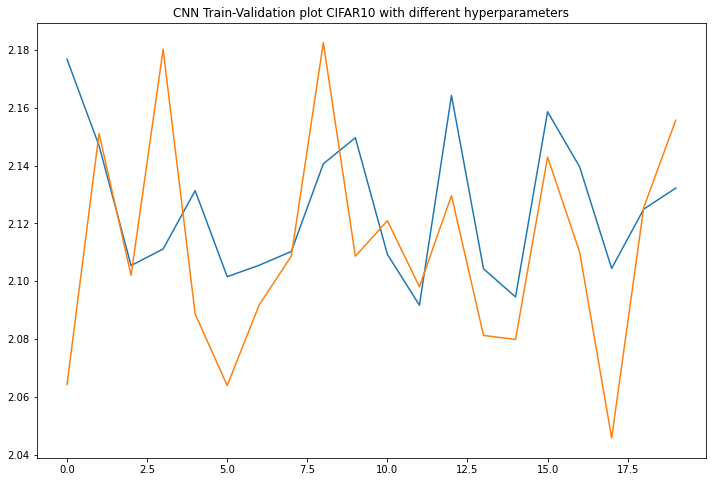

In [11]:
plt.figure(figsize=(12,8))
plt.plot(training_loss_history)
plt.plot(validation_loss_history)
plt.title("CNN Train-Validation plot CIFAR10 with different hyperparameters")
plt.savefig("CNN Train-Validation plot CIFAR10 with different hyperparameters.png")

In [12]:
myCnn=MyCNN().to(device)
training_epochs=8
batch_size=4
obj=nn.CrossEntropyLoss().to(device)
opt=SGD(myCnn.parameters(),lr=0.1, momentum=0.5)

In [13]:
start=time.time()

for epoch in range(training_epochs):
    training_loss=0.0
    validation_loss=0.0
    for X,y in tr10_loader:
        X=X.to(device)
        y=y.to(device)
        
        opt.zero_grad()
        output=myCnn(X) 
        cost=obj(output,y)
        cost.backward()
        opt.step()
        
print("Time :",time.time()-start)

Time : 59.35227847099304


In [14]:
ts10_loader=DataLoader(dataset=ts10,
                      batch_size=batch_size,
                      shuffle=False)

In [15]:
start=time.time()

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in ts10_loader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = myCnn(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy :',(100 * correct / total))
print("Time :",time.time()-start)

Accuracy : 21.81
Time : 4.005919694900513


In [16]:
ds100=CIFAR100(root="./data",download=True,train=True,transform=transform)
ts100=CIFAR100(root="./data",download=True,train=False,transform=transform)
tr100,vs100,_=random_split(ds100,[10000,10000,30000],torch.manual_seed(1))

Files already downloaded and verified
Files already downloaded and verified


In [17]:
tr100_loader=DataLoader(dataset=tr100,
                      batch_size=batch_size,
                      shuffle=True,
                      drop_last=True)

vs100_loader=DataLoader(dataset=vs100,
                      batch_size=batch_size,
                      shuffle=False)

In [18]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.layer3 = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,100),
            )
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        #out = out.view(out.size(0),-1) #Flatten feature mapes to one-dimension vector
        out = out.view(-1,16*5*5)
        out = self.layer3(out)
        return out


In [19]:
myCnn=MyCNN().to(device)
training_epochs=20
batch_size=4
obj=nn.CrossEntropyLoss().to(device)
opt=SGD(myCnn.parameters(),lr=0.1, momentum=0.5)

In [20]:
start=time.time()

training_loss_history_=[]
validation_loss_history_=[]

for epoch in range(training_epochs):
    training_loss=0.0
    validation_loss=0.0
    for X,y in tr100_loader:
        X=X.to(device)
        y=y.to(device)
        
        opt.zero_grad()
        output=myCnn(X) 
        cost=obj(output,y)
        cost.backward()
        opt.step()
        
        training_loss+=cost.item()
        
    with torch.no_grad():
        for X,y in vs100_loader:
            X=X.to(device)
            y=y.to(device)
            
            output=myCnn(X)
            cost=obj(output,y)
            
            validation_loss+=cost.item()
            
#    if epoch==39:        
#        sch.step()        
    training_loss_history_.append(training_loss/(10000/batch_size))
    validation_loss_history_.append(validation_loss/(10000/batch_size))
    print("[ Epoch: ",epoch+1," loss :",training_loss/(10000/batch_size)," validation :",validation_loss/(10000/batch_size),"]")
    
print("Time :",time.time()-start)

[ Epoch:  1  loss : 4.583733756732941  validation : 4.489324999713897 ]
[ Epoch:  2  loss : 4.533722188854218  validation : 4.4735770578384395 ]
[ Epoch:  3  loss : 4.4983217001914975  validation : 4.572512138462066 ]
[ Epoch:  4  loss : 4.480565774154663  validation : 4.448242782020569 ]
[ Epoch:  5  loss : 4.457562975406646  validation : 4.522145598220825 ]
[ Epoch:  6  loss : 4.4863352494239805  validation : 4.433407045173645 ]
[ Epoch:  7  loss : 4.485873033428192  validation : 4.478488894557953 ]
[ Epoch:  8  loss : 4.497800670528412  validation : 4.459478083515167 ]
[ Epoch:  9  loss : 4.4874514335632325  validation : 4.466631436443329 ]
[ Epoch:  10  loss : 4.502920698928833  validation : 4.482889406585693 ]
[ Epoch:  11  loss : 4.560310627841949  validation : 4.439044817256928 ]
[ Epoch:  12  loss : 4.4703093834877015  validation : 4.498694712543488 ]
[ Epoch:  13  loss : 4.477854071617126  validation : 4.461938011837006 ]
[ Epoch:  14  loss : 4.457244429206848  validation : 4.

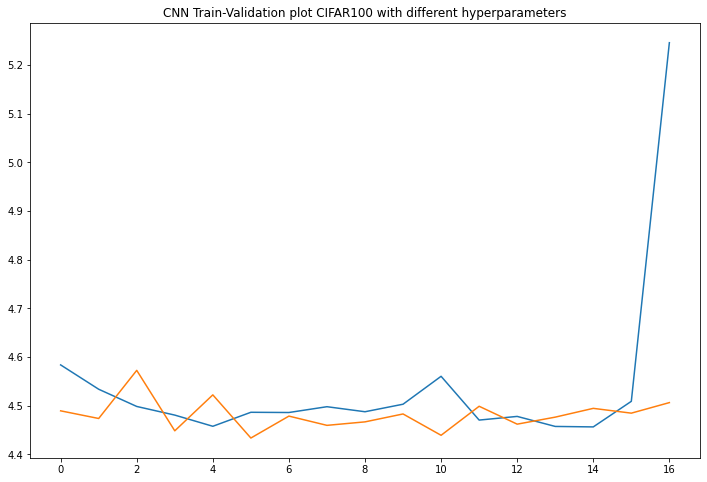

In [21]:
plt.figure(figsize=(12,8))
plt.plot(training_loss_history_)
plt.plot(validation_loss_history_)
plt.title("CNN Train-Validation plot CIFAR100 with different hyperparameters")
plt.savefig("CNN Train-Validation plot CIFAR100 with different hyperparameters.png")

In [22]:
myCnn=MyCNN().to(device)
training_epochs=11
batch_size=4
obj=nn.CrossEntropyLoss().to(device)
opt=SGD(myCnn.parameters(),lr=0.001, momentum=0.9)

In [23]:
start=time.time()

for epoch in range(training_epochs):
    training_loss=0.0
    validation_loss=0.0
    for X,y in tr100_loader:
        X=X.to(device)
        y=y.to(device)
        
        opt.zero_grad()
        output=myCnn(X) 
        cost=obj(output,y)
        cost.backward()
        opt.step()
        
print("Time :",time.time()-start)

Time : 79.8861575126648


In [24]:
ts100_loader=DataLoader(dataset=ts100,
                      batch_size=batch_size,
                      shuffle=False)

In [25]:
start=time.time()

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in ts100_loader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = myCnn(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy :',(100 * correct / total))
print("Time :",time.time()-start)

Accuracy : 15.92
Time : 3.98995304107666
